<a target="_blank" href="https://colab.research.google.com/github/mariajosesalasmiranda/Emotion-Vision/blob/main/train_model.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Facial Emotion Recognition:  Classifying Expressions Using Deep Neural Networks

Brief intoriodtion of this projetc

### Step 1: Install the necessaries libraries


To implement the project, we will need to import the following libraries:
- **Numpy**: used for numerical operations and handling arrays efficiently
- **Matplotlib**: a library for data visualization, useful for plotting graphs and visualizing data during model training and evaluation
- **TensorFlow**: deep learning framework used for building, training, and deploying our emotion recognition model
- **OS**: provides functionalities for interacting with the operating system, such as file handling and directory management
- **CV2 (OpenCV)**: a library for computer vision tasks, used for image preprocessing, face detection, and handling video streams


To install these libraries, you can use the following commands in your Python environment (e.g., Jupyter Notebook, Anaconda, or a terminal with pip):
```
pip install numpy matplotlib tensorflow opencv-python
```

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

### Step 2: Download the FER-2013 dataset


The dataset can be downloaded from the [Kaggle community](https://www.kaggle.com/datasets/msambare/fer2013?select=train). 

The dataset includes images labeled across seven emotion classes:
- Angry
- Disgust
- Fear
- Happy
- Sad
- Surprised
- Neutral

In [2]:
# read image from the dataset
img_array = cv2.imread("archive/test/angry/PrivateTest_7833671.jpg")

In [3]:
# rgb image
img_array.shape

(48, 48, 3)

**OUTPUT**
- Height: 48 pixels
- Width: 48 pixels
- Channels: 3 (Red, Green, Blue)

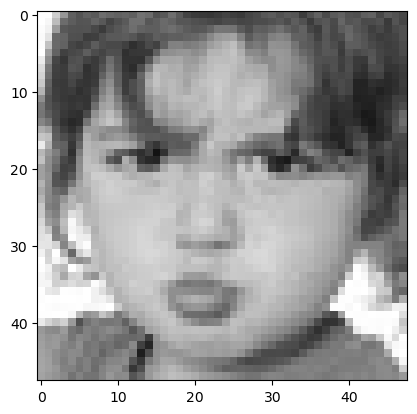

In [4]:
plt.imshow(img_array)

The image is blur because is 48x48

### Step 3: Prepare the training dataset

In [5]:
# training data
Datadirectory = "archive/train/"

In [6]:
# define the classes
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

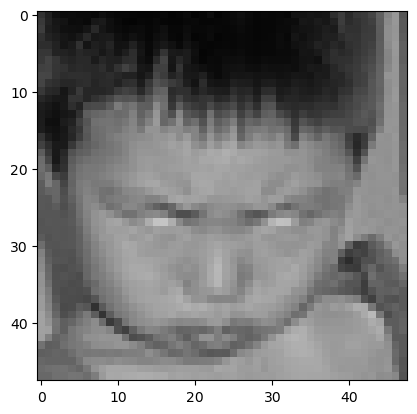

In [ ]:
# read al the images in the training dataset
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert color space
        plt.imshow(img_array)
        plt.show()
        break 
    break # break the loop

I have just executed the first image in the first folder

#### Reshape the images

To use transfer learning with a deep learning classifier, it is necessary to reshape the images to match the input requirements of the pre-trained model. We will use **MobileNet** as the base model for transfer learning.

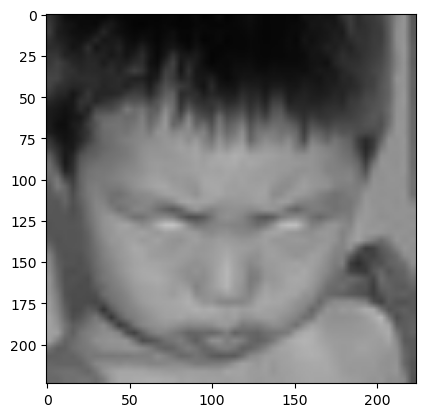

In [8]:
# resize the images from 48x48 pixels to 224x224 pixels
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)

In [9]:
# check the shape
new_array.shape

(224, 224, 3)

#### Convert the images into array

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [13]:
# call the function
create_training_Data() 

KeyboardInterrupt: 

In [14]:
# shorlist the images
print(len(training_Data)) 

4556


#### Shuffle the dataset

The data is mixed rather than sequential to ensure the model learns to generalize features instead of memorizing patterns, making it more robust

In [15]:
import random
random.shuffle(training_Data)

#### Feature and Labels

In [16]:
x = [] # data
y = [] # label

for features, label in training_Data:
    x.append(features) # conitains the images
    y.append(label) # contains the labels

x = np.array(x).reshape(-1, img_size, img_size, 3) # convert the data into 4 dimensions

**OUTPUT** \
The data now has 4 dimensions because **MobileNet**, our chosen transfer learning model, uses depthwise separable convolution, which adds an additional dimension.

In [17]:
x.shape

(4556, 224, 224, 3)

### Step 4: Normalise the dataset

Instead of using scikit-learn for normalization, we simply divide the pixel values by 255 to scale them between 0 and 1

In [24]:
x = x/255.0; 

#### check the labels

In [29]:
type(y)

list

In [49]:
y = np.array(y)

In [50]:
y.shape

(4556,)

### Step 5: Training the dataset 

In [51]:
# import the libraries
from tensorflow import keras
from tensorflow.keras import layers

In [52]:
# define the pre-trained model. In this case mobileNetV2
model = tf.keras.applications.MobileNetV2()


In [53]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

### Step 6: Fine-Tuning the dataset

In [54]:
# check the first layer
base_input = model.layers[0].input
base_input


<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [55]:
# check the last layer
base_output = model.layers[-2].output # because we don't want 1000 classes, we only need 7
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [56]:
final_output = layers.Dense(128)(base_output) # add a dense layer after the global average pooling layer
final_output = layers.Activation('relu')(final_output) # activation function
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) # because my classes are 7

We use Softmax as the last activation function because it is ideal for classification tasks, converting outputs into probabilities for each class.

In [57]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

With this process we have created new layers.

In [58]:
# create the new model
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [59]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

### Step 7: Compile and train the model

In [60]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
new_model.fit(x, y, epochs=5)

Epoch 1/5
143/143 [==============================] - 478s 3s/step - loss: 0.0233 - accuracy: 0.9930
Epoch 2/5
143/143 [==============================] - 486s 3s/step - loss: 5.5705e-08 - accuracy: 1.0000
Epoch 3/5
143/143 [==============================] - 439s 3s/step - loss: 4.3905e-08 - accuracy: 1.0000
Epoch 4/5
143/143 [==============================] - 412s 3s/step - loss: 6.5255e-08 - accuracy: 1.0000
Epoch 5/5
143/143 [==============================] - 413s 3s/step - loss: 2.8102e-08 - accuracy: 1.0000


In [62]:
new_model.save('my_model.h5')

In [63]:
new_model = tf.keras.models.load_model('my_model.h5')

## Deploy an image

We could test our model but instead we are going to deploy an image

In [64]:
frame = cv2.imread("happy.jpg")

In [65]:
frame.shape

(174, 290, 3)

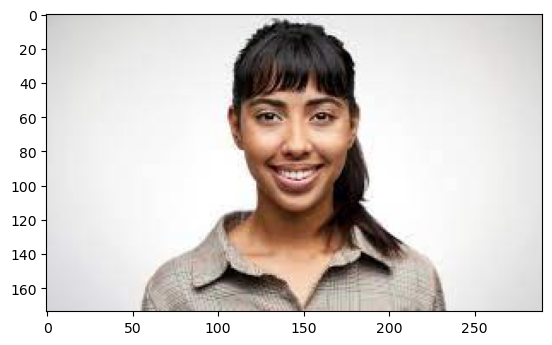

In [66]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Now we need a face detection algortih
haar > already train weights for face detection

In [67]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

i need to converto in gray because haar works with gray

In [68]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [69]:
gray.shape

(174, 290)

In [70]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h), (255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh,ex:ex+ew]

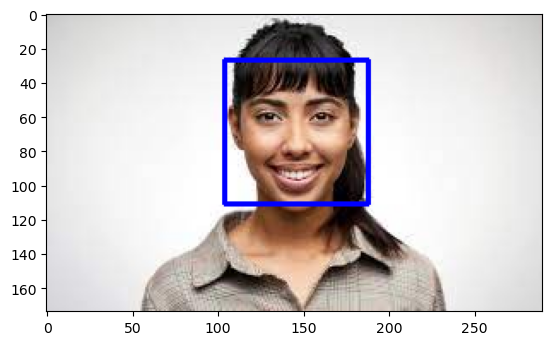

In [71]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

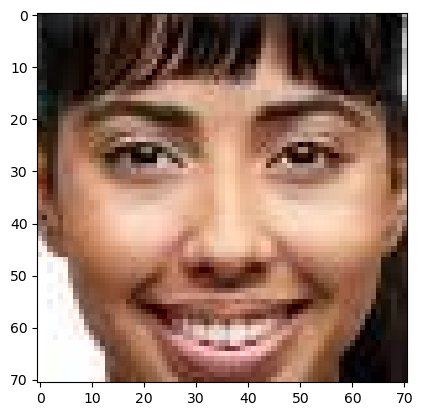

In [72]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [73]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
final_image = final_image/255.0 # normalizing

## Predictions

In [74]:
Predictions = new_model.predict(final_image)

1/1 [==============================] - 6s 6s/step


In [75]:
Predictions[0]

array([1.0000000e+00, 2.9450750e-17, 4.0674216e-19, 8.8287693e-17,
       4.2398727e-17, 1.6390281e-13, 3.6244238e-18], dtype=float32)

In [76]:
np.argmax(Predictions)

0